# ניתוח 26.12.21

In [4]:
from random import randint as ri
from itertools import chain
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#all
all_data = pd.read_excel("Data2/קובץ מתכלל כללי.xlsx")

#sviot ratzon
all_data[all_data.columns[41]] = all_data[all_data.columns[41]].apply(lambda x: "כן" if x==0 else "לא")

#colors
my_colors = ["orange","yellow","red","lime","pink",
         "mediumpurple","skyblue","cornflowerblue","gray","gainsboro",
         "gold","turquoise","chocolate","forestgreen","orchid"]


In [5]:
df = all_data[all_data[all_data.columns[55]]=="מיטבי"]

l = [a.split(",") for a in df.iloc[:,15].dropna()]
l = list(chain.from_iterable(l))
#[x+1 if x >= 45 else x+5 for x in l]
l =  [a[1:] if a.startswith(" ") else a for a in l]  
l =  [a[:-1] if a.endswith(" ") else a for a in l]  
#set(l)
Data = dict(Counter(l))
Data = {k: Data[k] for k in sorted(Data, key=Data.get, reverse=True)}
Data

{'תחבורה ציבורית - אוטובוס': 319,
 'תחבורה ציבורית - רכבת': 265,
 'הסעות צבאיות שהוזמנו על ידי היחידה': 126,
 'רכב פרטי': 100,
 'הסעה צבאית שהוזמנה ע"י היחידה ללא שימוש באפליקציית "שאט"ל"': 92,
 'הסעה צבאית שהוזמנה ליחידה על ידי אפליקציית "שאט"ל"': 84,
 'הסעות צבאיות בהזמנת החייל (אפליקציית "שאטל")': 42,
 'אחר': 11,
 'טרמפים': 11}

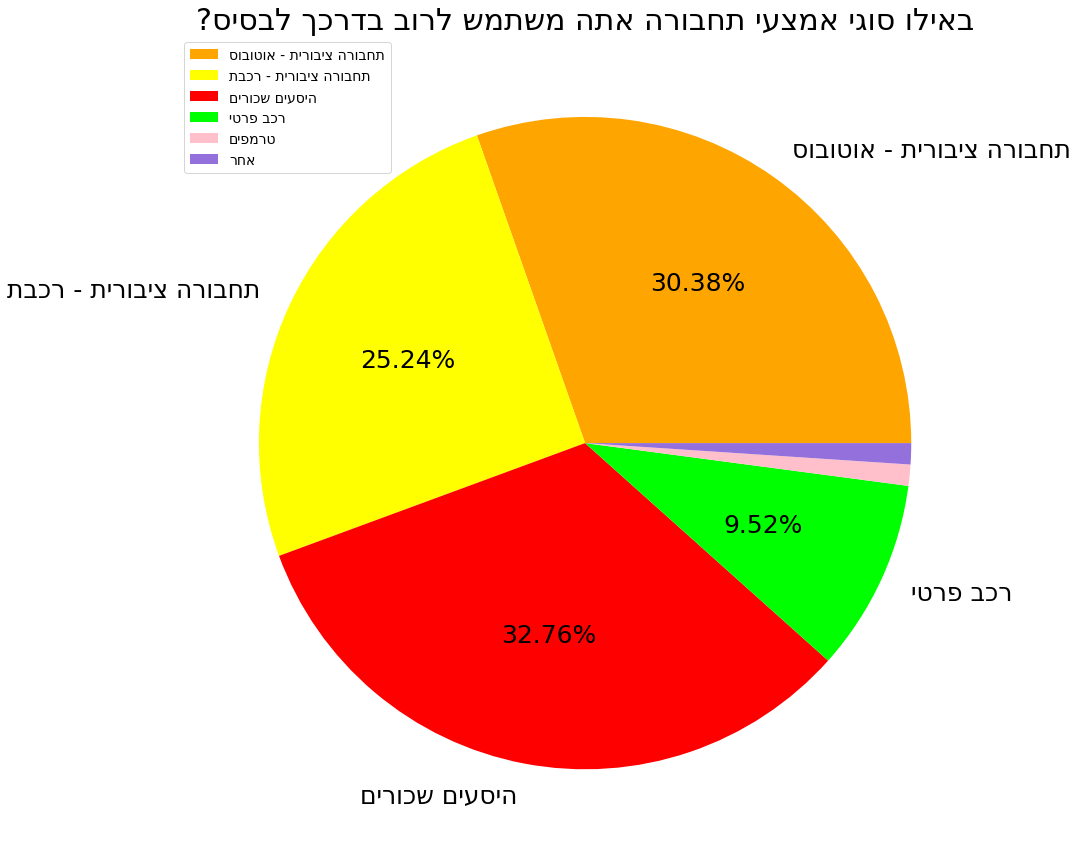

In [6]:
labels = ["תחבורה ציבורית - אוטובוס","תחבורה ציבורית - רכבת","היסעים שכורים","רכב פרטי","טרמפים","אחר"]
sizes = [319,265,344,100,11,11]

labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,np.array(sizes)/sum(sizes)))

colors = dict(zip(labels,my_colors[:6]))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels=[label if label_dict[label]>0.035  else "" for label in labels],colors = [colors[p] for p in labels], autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3.5 else '',textprops={'fontsize': 25})
title_text = ""
plt.title(f'{title[50::-1]}', size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,loc = 'upper left',fontsize = 14)
plt.show()